In [1]:
import pandas as pd

candies = pd.read_csv('../data/candy-data.csv')

candies.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [2]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['chocolate','sugarpercent','pricepercent','winpercent']
new_candies = candies.drop([c for c in candies.columns if c not in new_columns], axis=1)
new_candies.dropna(inplace=True)

new_candies.head()

,chocolate,sugarpercent,pricepercent,winpercent
0,1,0.732,0.860,66.971725
1,1,0.604,0.511,67.602936
2,0,0.011,0.116,32.261086
3,0,0.011,0.511,46.116505
4,0,0.906,0.511,52.341465


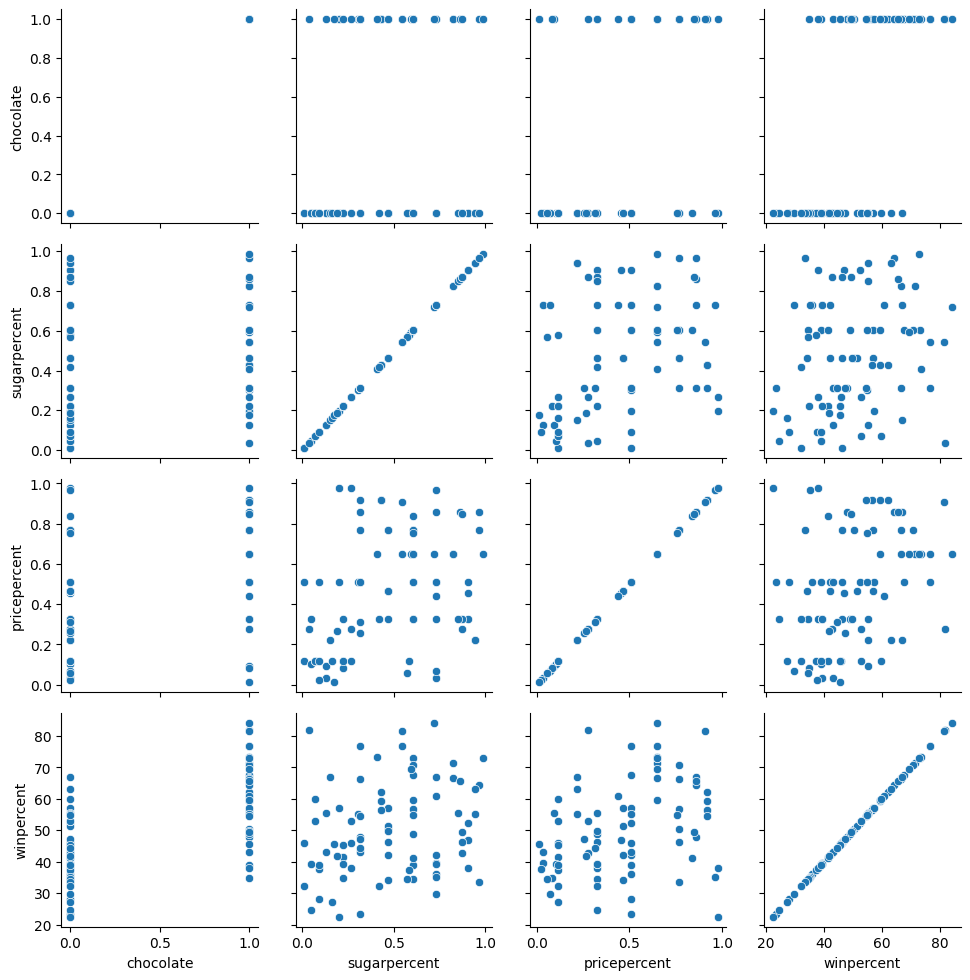

In [3]:
import seaborn as sns

g = sns.PairGrid(new_candies)
g.map(sns.scatterplot)

<AxesSubplot:xlabel='chocolate', ylabel='sugarpercent'>

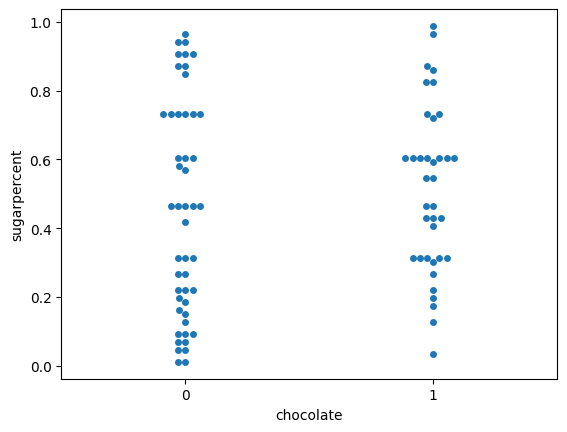

In [4]:
sns.swarmplot(x='chocolate', y='sugarpercent', data=new_candies)

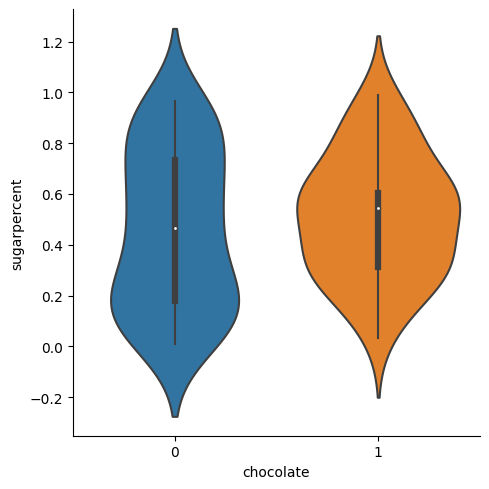

In [5]:
sns.catplot(x='chocolate', y='sugarpercent', kind='violin', data=new_candies)

In [6]:
from sklearn.model_selection import train_test_split

selected_features = ['sugarpercent','pricepercent','winpercent']

X = new_candies[selected_features]
y = new_candies['chocolate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print('Predicted labels: ', pred)
print('Accurary: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17

Predicted labels:  [1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0]
Accurary:  0.7647058823529411


In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[8, 1],
       [3, 5]])

<AxesSubplot:>

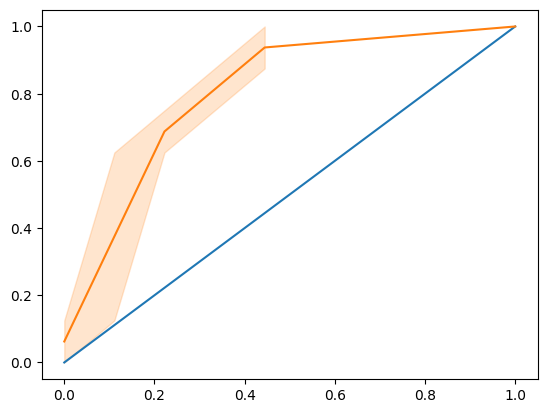

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot(x=[0, 1], y=[0, 1])
sns.lineplot(x=fpr, y=tpr)

In [10]:
auc = roc_auc_score(y_test, y_scores[:, 1])
print(auc)

0.8194444444444444
